In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import os

dataset_mapping = dict(cifar10=torchvision.datasets.CIFAR10, 
                       mnist=torchvision.datasets.MNIST, 
                       fashion=torchvision.datasets.FashionMNIST)

def get_dataset_iterator(dataset_name='mnist', batch_size=32, data_path='./data', num_workers=2):
    ds = dataset_mapping[dataset_name]
    
    # fashion and mnist paths collide
    _data_path = data_path
    if dataset_name == 'fashion':
        _data_path = os.path.join(_data_path, 'fashion')
        print("fashion: %s" % _data_path)
        
    # normalize to [-1, 1]
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    # train
    trainset = ds(root=_data_path, train=True,
                 download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)

    # test
    testset = ds(root=_data_path, train=False,
                 download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                              shuffle=False, num_workers=num_workers)
    
    # get some random training images
    train_iter = iter(trainloader)
    test_iter = iter(testloader)
    
    return train_iter, test_iter


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

labels: [7, 3, 1, 3, 9, 3, 0, 4, 1, 7, 1, 5, 1, 4, 6, 8, 9, 7, 1, 9, 7, 5, 9, 6, 6, 6, 6, 6, 4, 5, 2, 2]


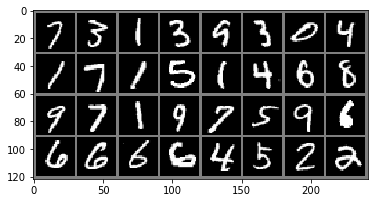

In [7]:
# test mnist
train, test = get_dataset_iterator(dataset_name='mnist')

images, labels = train.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("labels: %s" % labels.tolist())
plt.show()


Files already downloaded and verified
Files already downloaded and verified
  cat truck  deer  bird   dog  bird  deer   dog   dog  ship horse  deer plane  frog plane   cat  bird  frog  deer  deer   dog  bird truck  deer plane  frog   car truck truck  bird   car  ship


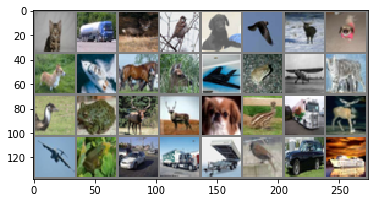

In [8]:
# test cifar
train, test = get_dataset_iterator(dataset_name='cifar10')

images, labels = train.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(' '.join('%5s' % classes[l] for l in labels))
plt.show()


fashion: ./data/fashion
trouser sneaker tshirt/top  coat tshirt/top tshirt/top   bag sandal tshirt/top ankle_boot ankle_boot tshirt/top  coat  coat trouser shirt   bag tshirt/top sneaker shirt ankle_boot sneaker   bag   bag tshirt/top shirt sandal sandal dress dress sandal   bag


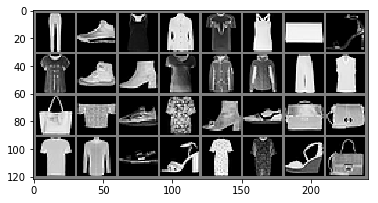

In [9]:
# test mnist
train, test = get_dataset_iterator(dataset_name='fashion')

images, labels = train.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
classes = ('tshirt/top', 'trouser', 'pullover', 'dress',
           'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot')

print(' '.join('%5s' % classes[l] for l in labels))
plt.show()
